In [62]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /usr/local/lib/python3.7/dist-packages (0.11.1)


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE

In [52]:
#importação de dados
url_filmes = 'https://raw.githubusercontent.com/oyurimatheus/clusterirng/master/movies/movies.csv'
filmes = pd.read_csv(url_filmes)

filmes.columns = ['filme_id', 'titulo', 'generos']

filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
#Cria colunas com generos
generos  = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
scaler = StandardScaler()
generos_escaldos = scaler.fit_transform(generos)
generos_escaldos

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [16]:
modelo = KMeans(n_clusters=3)
modelo.fit(generos_escaldos)

modelo.labels_

array([2, 2, 1, ..., 1, 2, 1], dtype=int32)

In [19]:
grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns=generos.columns)

grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.450874,-0.107659,-0.233313,-0.267197,-0.559631,0.847180,-0.213541,0.051273,-0.122486,0.271158,0.410863,0.020914,-0.174899,0.623057,-0.316348,0.144007,1.451273,-0.117526,-0.072050
1,0.031799,-0.172215,-0.096097,-0.252821,-0.270451,0.183437,-0.278083,0.113062,0.070530,-0.088855,-0.089894,-0.116138,-0.058437,0.010180,-0.220476,0.163223,-0.075270,-0.486873,0.071151,0.040568
2,-0.059180,-0.008647,0.902222,2.247599,2.448803,0.209627,-0.314762,-0.202535,-0.592135,0.892150,-0.094926,-0.275495,0.330544,0.374809,-0.126792,-0.272020,0.130177,-0.470333,-0.170020,-0.084214


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb43b6bb290>,
      dtype=object)

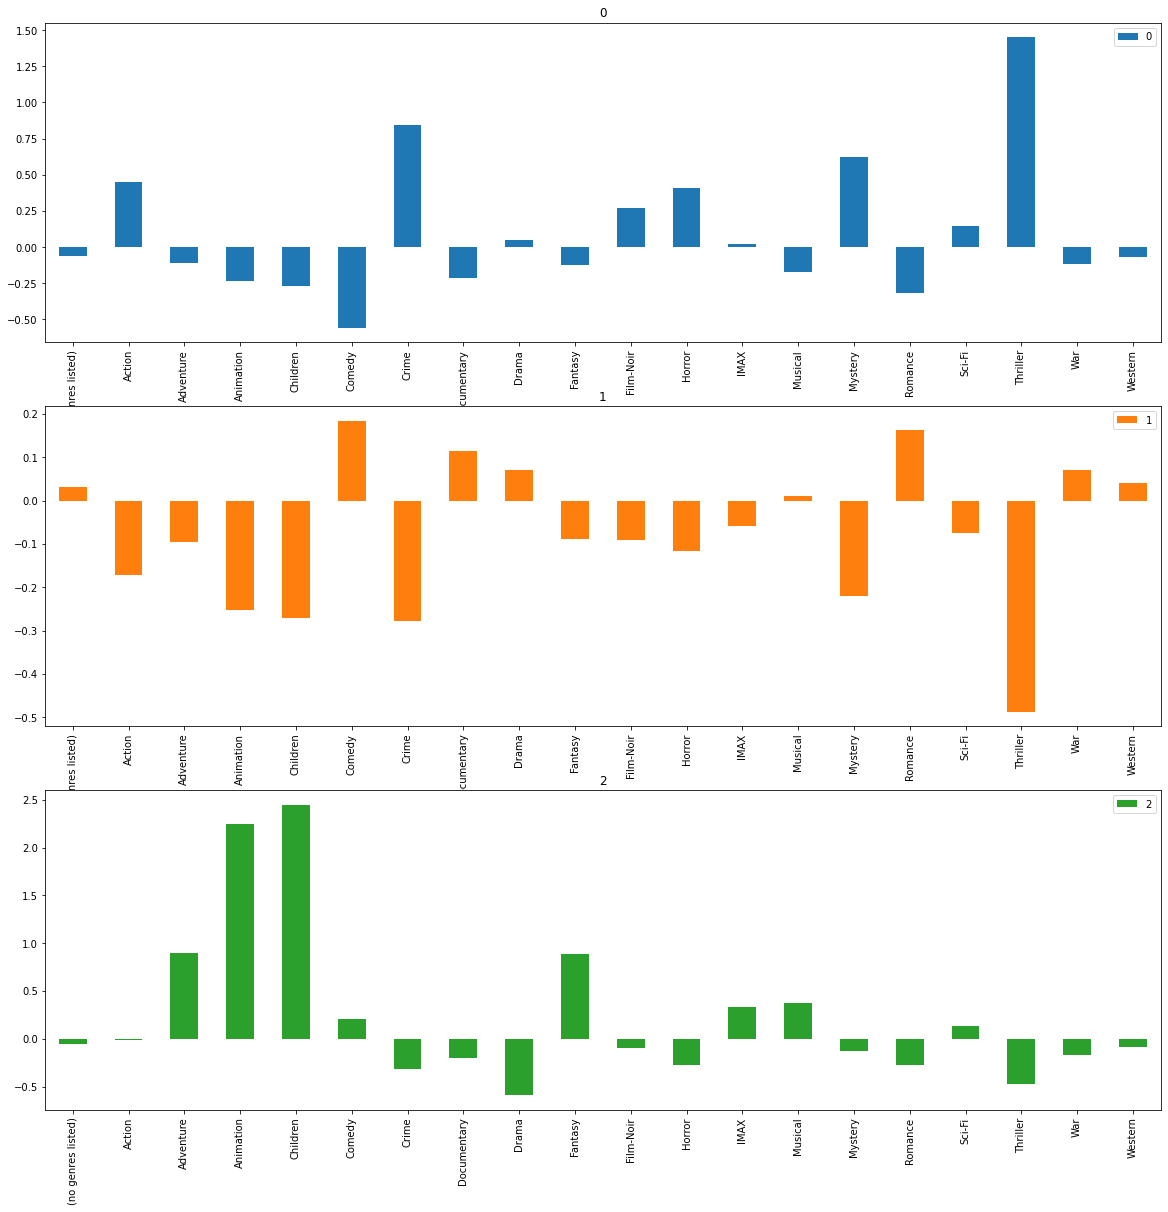

In [28]:
grupos.transpose().plot.bar(subplots=True,
                            figsize=(20,20),
                            sharex=False)

In [53]:
dados, _ = make_blobs(n_samples=9742, n_features=2, random_state=7)
dados = pd.DataFrame(dados, columns=["coluna_1","coluna_2"])
dados.head()

,coluna_1,coluna_2
0,9.763012,1.011105
1,8.777366,1.441515
2,-2.115411,4.886707
3,8.610486,-0.100920
4,-7.880706,5.298548


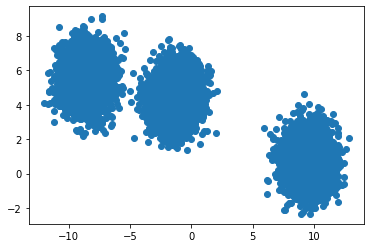

In [54]:
plt.scatter(x=dados.coluna_1, y=dados.coluna_2)

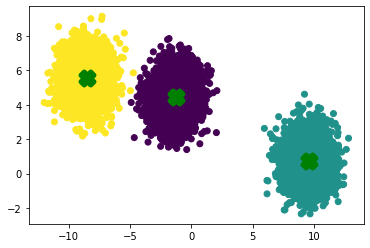

In [57]:
grupos_ = modelo.fit_predict(dados)
centroides = modelo.cluster_centers_

plt.scatter(x=dados.coluna_1,
            y=dados.coluna_2,
            c= grupos_,
            cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1],
           marker='X', s=169, linewidths=5,
           color='g', zorder=8)

In [61]:
tnse = TSNE()

visualizacao = tnse.fit_transform(generos_escaldos)
visualizacao

array([[-50.93336  ,  17.199951 ],
       [ 77.08716  ,  -6.170889 ],
       [ 28.073883 , -17.617962 ],
       ...,
       [  3.1444044,  -9.54436  ],
       [-49.102978 , -19.847906 ],
       [-14.66009  ,  22.568474 ]], dtype=float32)

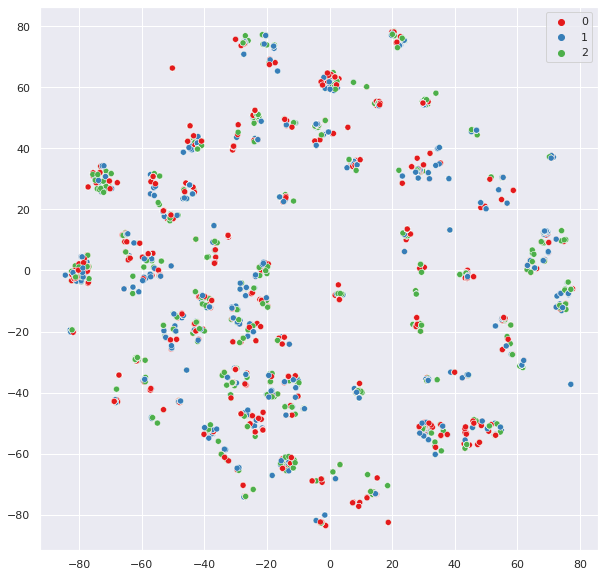

In [75]:
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(x=visualizacao[:,0],
                y=visualizacao[:,1],
                hue = modelo.labels_,
                palette = sns.color_palette('Set1',3))

In [79]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return[numero_de_clusters, modelo.inertia_]

In [81]:
resultado = [kmeans(numero_de_clusters, generos_escaldos) for numero_de_clusters in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 179909.54996425138],
 [3, 166307.67428539347],
 [4, 156662.0354289293],
 [5, 147805.84729100467],
 [6, 139734.7058525148],
 [7, 129230.51721324513],
 [8, 119887.69406374142],
 [9, 110895.17707529436],
 [10, 101445.00961078977],
 [11, 94026.32249628476],
 [12, 86357.30004155687],
 [13, 81209.33221026463],
 [14, 74690.09074085046],
 [15, 66844.8975406968],
 [16, 65626.97948808281],
 [17, 60323.175825646686],
 [18, 60625.499009697254],
 [19, 56451.30669128297],
 [20, 55674.91582202655],
 [21, 53142.41444927199],
 [22, 51520.2842958615],
 [23, 50261.8341370859],
 [24, 49350.872477037556],
 [25, 47753.56911045324],
 [26, 46104.60466173286],
 [27, 44951.84935683215],
 [28, 44200.33358378542],
 [29, 43489.07290687576],
 [30, 43175.212389250264],
 [31, 41525.2717551906],
 [32, 41665.92642410588],
 [33, 39742.396284031536],
 [34, 38823.02949865466],
 [35, 38530.67232539298],
 [36, 37424.2321396185],
 [37, 37521.73661558168],
 [38, 36599.71201104118],
 [39, 36096.46560764316

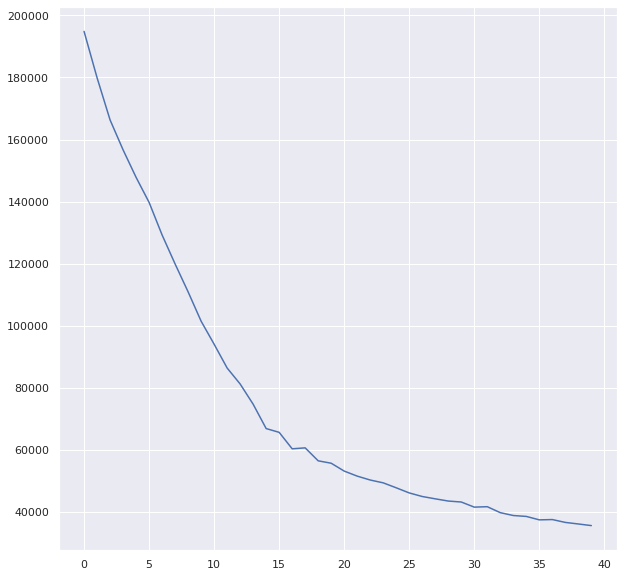

In [84]:
resultado = pd.DataFrame(resultado,
                         columns = ['grupos', 'inertia'])

resultado.inertia.plot()